![pandas](pandas.jpg)

#[`pandas`](http://pandas.pydata.org/) Can Make Your Life Easier

## Review

1. Python makes it easier to traverse the whole analytic pipeline.
2. It is open source.
3. It is flexible enough to build your own products and custom solutions.
4. It has an awesome and accessible community/ecosystem.
5. It's free.

## What is `pandas`

**Website's Definition**

>*`pandas` is an open source BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.*

**My Definition**

>*`pandas` is a critical part of the Python scientific computing stack.  It is a wrapper around [`numpy`](http://www.numpy.org/) that provides tools to work with multi-dimensional data in a tabular arrangement.  These data management tools provide functions including, but not limited to, the following:*
+ Reading and writing data from many formats (text files, Excel, [SQL](https://en.wikipedia.org/wiki/SQL) databases, [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format)) and the web;
+ Reshaping of data;
+ Extensive hierarchical indexing/filtering/subsetting capability;
+ Time series and general data alignment;
+ Merging, SQL type joins, and conatenation;
+ Convenient tools for handling missing data.

>*In general, pandas has proven to be so useful that a number of libraries have been retrofitted to ensure compabitibility (most notably [`scikit learn`](http://scikit-learn.org/stable/)), and subsequent libraries have used it as a basis.*

In [51]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sb
from IPython.display import HTML
import statsmodels.formula.api as smf
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Basic Building Blocks

### Series

In [3]:
#Generate random vector of data
rand_vec=np.random.uniform(size=6)

print 'Here is our random vector of data:',rand_vec

#Capture vector in a series
ser=Series(rand_vec)

print '\nHere is our random vector housed in a Series object'
ser

Here is our random vector of data: [ 0.15020837  0.91940789  0.36470187  0.79488135  0.9870953   0.72769181]

Here is our random vector housed in a Series object


0    0.150208
1    0.919408
2    0.364702
3    0.794881
4    0.987095
5    0.727692
dtype: float64

Not much functionality over a `numpy` array here, but Series have a few more tricks...

In [4]:
#Generate copy of series
ser2=ser

#Generate 'meaningful' row labels
idx=pd.Index(['a','b','c','d','e','f'])
print 'This is a standalone index object:',idx

#Reassign new labels to Series index
ser2.index=idx
ser2.index.name='label'
print '\nSeries with improved row labels from our new index\n',ser2

#Use index to reassign value
ser2.ix['c']=.5
print '\nSeries with value in row `c` modified\n',ser2

#Capture 3 largest values
print '\nThe 3 largest values in the Series\n',ser2.nlargest(3)

#Calculate the cumulative sum
print '\nThe cumulative sum of the Series values\n',ser2.cumsum()

#Capture 2x3 array
print '\nJust an example of Fortranish (?) ancestry\n'
print ser2.reshape(2,3)

This is a standalone index object: Index([u'a', u'b', u'c', u'd', u'e', u'f'], dtype='object')

Series with improved row labels from our new index
label
a    0.150208
b    0.919408
c    0.364702
d    0.794881
e    0.987095
f    0.727692
dtype: float64

Series with value in row `c` modified
label
a    0.150208
b    0.919408
c    0.500000
d    0.794881
e    0.987095
f    0.727692
dtype: float64

The 3 largest values in the Series
label
e    0.987095
b    0.919408
d    0.794881
dtype: float64

The cumulative sum of the Series values
label
a    0.150208
b    1.069616
c    1.569616
d    2.364498
e    3.351593
f    4.079285
dtype: float64

Just an example of Fortranish (?) ancestry

[[ 0.15020837  0.91940789  0.5       ]
 [ 0.79488135  0.9870953   0.72769181]]


The thing to remember is that, under the hood, a Series is a [dictionary](https://docs.python.org/2/tutorial/datastructures.html#dictionaries) on steroids.

In [5]:
ser2.to_dict()

{'a': 0.15020837411009857,
 'b': 0.91940789014105129,
 'c': 0.5,
 'd': 0.79488134865784243,
 'e': 0.98709530301079629,
 'f': 0.72769181298709285}

### DataFrames

DataFrame objects are collections of Series objects.

In [6]:
#Generate DataFrame
d=DataFrame(np.random.uniform(size=20).reshape(4,5),
            columns='a b c d e'.split(' '),
            index=['one','two','three','four'])

d

,a,b,c,d,e
one,0.493770,0.796485,0.868978,0.119511,0.282678
two,0.864655,0.142247,0.533844,0.715986,0.431304
three,0.324495,0.363892,0.813495,0.825338,0.613540
four,0.013648,0.651362,0.947066,0.489645,0.222942


Indexing is super easy!

In [7]:
print d.ix['two'][['b','c']]
print d.ix['two',['b','c']]

b    0.142247
c    0.533844
Name: two, dtype: float64
b    0.142247
c    0.533844
Name: two, dtype: float64


Creating new variables is a breeze...

In [8]:
d['f']=d['a']+d['c']
d['d_mean']=d['d']-d['d'].mean()

d

,a,b,c,d,e,f,d_mean
one,0.493770,0.796485,0.868978,0.119511,0.282678,1.362747,-0.418109
two,0.864655,0.142247,0.533844,0.715986,0.431304,1.398499,0.178366
three,0.324495,0.363892,0.813495,0.825338,0.613540,1.137989,0.287718
four,0.013648,0.651362,0.947066,0.489645,0.222942,0.960714,-0.047975


...as are element-wise transformations.

In [9]:
print '***PLUS ONE***\n',d.applymap(lambda x: x+1)

def pos_only(x):
    if x<0:
        return np.nan
    else:
        return x

print '\n***POSITIVE ONLY***\n',d.applymap(lambda x: pos_only(x))

***PLUS ONE***
              a         b         c         d         e         f    d_mean
one    1.493770  1.796485  1.868978  1.119511  1.282678  2.362747  0.581891
two    1.864655  1.142247  1.533844  1.715986  1.431304  2.398499  1.178366
three  1.324495  1.363892  1.813495  1.825338  1.613540  2.137989  1.287718
four   1.013648  1.651362  1.947066  1.489645  1.222942  1.960714  0.952025

***POSITIVE ONLY***
              a         b         c         d         e         f    d_mean
one    0.493770  0.796485  0.868978  0.119511  0.282678  1.362747       NaN
two    0.864655  0.142247  0.533844  0.715986  0.431304  1.398499  0.178366
three  0.324495  0.363892  0.813495  0.825338  0.613540  1.137989  0.287718
four   0.013648  0.651362  0.947066  0.489645  0.222942  0.960714       NaN


### Multidimensional Data (MultiIndex Functionality)

Suppose we want to add a third dimension to our data.

In [10]:
#Generate container to hold component DFs
df_list=[]

#Generate names for third dimension positions
third_names=['front','middle','back']

#For three positions in the third dimension...
for lab in third_names:
    #...generate the corresponding section of raw data...
    d=DataFrame(np.random.uniform(size=20).reshape(4,5),columns='a b c d e'.split(' '))
    #...name the columns dimension...
    d.columns.name='dim1'
    #...generate second and third dims (to go in index)...
    d['dim2']=['one','two','three','four']
    d['dim3']=lab
    #...set index...
    d.set_index(['dim3','dim2'],inplace=True)
    #...and throw the DF in the container
    df_list.append(d)
    
#Concatenate component DFs together
d3=pd.concat(df_list)

print d3

dim1                 a         b         c         d         e
dim3   dim2                                                   
front  one    0.774800  0.314647  0.640791  0.814232  0.697359
       two    0.171680  0.262930  0.563157  0.776920  0.636456
       three  0.144394  0.196392  0.259016  0.429835  0.112957
       four   0.443162  0.605224  0.864603  0.834945  0.385224
middle one    0.427811  0.125045  0.822809  0.055679  0.861047
       two    0.283491  0.144026  0.481584  0.651545  0.800916
       three  0.654559  0.760904  0.595765  0.092644  0.873484
       four   0.558239  0.102874  0.031678  0.049857  0.661763
back   one    0.326278  0.444574  0.376201  0.299137  0.443173
       two    0.182706  0.363105  0.704407  0.509076  0.040493
       three  0.547581  0.806554  0.760780  0.247863  0.179852
       four   0.108234  0.021494  0.383825  0.340359  0.921324


Everyone wants long form for some thing or another...

In [11]:
#Convert to long form
d3_long=d3.stack().sortlevel(0)

#Correct ordering of dim2 and dim3 labels
d3_long=d3_long.reindex(['one','two','three','four'],level='dim2')
d3_long=d3_long.reindex(['front','middle','back'],level='dim3')

d3_long

dim3    dim2   dim1
front   one    a       0.774800
               b       0.314647
               c       0.640791
               d       0.814232
               e       0.697359
        two    a       0.171680
               b       0.262930
               c       0.563157
               d       0.776920
               e       0.636456
        three  a       0.144394
               b       0.196392
               c       0.259016
               d       0.429835
               e       0.112957
        four   a       0.443162
               b       0.605224
               c       0.864603
               d       0.834945
               e       0.385224
middle  one    a       0.427811
               b       0.125045
               c       0.822809
               d       0.055679
               e       0.861047
        two    a       0.283491
               b       0.144026
               c       0.481584
               d       0.651545
               e       0.800916
        three  a    

...and sometimes we want only a cross-section....

In [12]:
d3_long.xs('b',level='dim1')

dim3    dim2 
front   one      0.314647
        two      0.262930
        three    0.196392
        four     0.605224
middle  one      0.125045
        two      0.144026
        three    0.760904
        four     0.102874
back    one      0.444574
        two      0.363105
        three    0.806554
        four     0.021494
dtype: float64

...or a more complicated slice of the data.

In [13]:
d3_long.loc[slice('front','middle'),slice('two','four'),['b','d']]

dim3    dim2   dim1
front   two    b       0.262930
               d       0.776920
        three  b       0.196392
               d       0.429835
        four   b       0.605224
               d       0.834945
middle  two    b       0.144026
               d       0.651545
        three  b       0.760904
               d       0.092644
        four   b       0.102874
               d       0.049857
dtype: float64

We can kick any dimension out to columns.

In [14]:
d3_long.unstack(level='dim3')

dim3           front    middle      back
dim2  dim1                              
one   a     0.774800  0.427811  0.326278
      b     0.314647  0.125045  0.444574
      c     0.640791  0.822809  0.376201
      d     0.814232  0.055679  0.299137
      e     0.697359  0.861047  0.443173
two   a     0.171680  0.283491  0.182706
      b     0.262930  0.144026  0.363105
      c     0.563157  0.481584  0.704407
      d     0.776920  0.651545  0.509076
      e     0.636456  0.800916  0.040493
three a     0.144394  0.654559  0.547581
      b     0.196392  0.760904  0.806554
      c     0.259016  0.595765  0.760780
      d     0.429835  0.092644  0.247863
      e     0.112957  0.873484  0.179852
four  a     0.443162  0.558239  0.108234
      b     0.605224  0.102874  0.021494
      c     0.864603  0.031678  0.383825
      d     0.834945  0.049857  0.340359
      e     0.385224  0.661763  0.921324

## Input/Output

For the most part, I deal with `.csv` files. Consequently, my "go to" input method is `read_csv()` and my output method is `to_csv()`.  However, pandas can handle many data formats.

In [15]:
HTML('<iframe src=http://pandas.pydata.org/pandas-docs/stable/io.html width=1000 height=500></iframe>')

Maybe we are just really into Medicaid data housed in Stata sets...

In [16]:
#Identify data location
# data_dir='O:/Analyst/Nadwa/MEDICAID/Output/'

#Read in Medicaid data
medicaid=pd.read_stata('Medicaid_Risk_Class(1979-2011).dta')

#Set index
medicaid.set_index(['year','medicaid_risk_class'],inplace=True)

#Sort index
medicaid.sortlevel(0,inplace=True)

medicaid

medicaidR       medicaidPR  \
year medicaid_risk_class                                        
1979 Disabled                 1766549.602577   1792424.562538   
     Children(non-disabled)   8599666.791954   8687674.821480   
     Adults(non-disabled)     4841204.803772   4879044.803635   
     Elderly(non-disabled)    3349458.301521   3485592.302284   
1980 Disabled                 1778188.348282   1778188.348282   
     Children(non-disabled)   8943688.522209   8943688.522209   
     Adults(non-disabled)     5255202.770969   5255202.770969   
     Elderly(non-disabled)    3034660.692047   3034660.692047   
1982 Disabled                 1708216.598488   1751541.578285   
     Children(non-disabled)   9103620.038713   9103620.038713   
     Adults(non-disabled)     5286374.358440   5335546.798573   
     Elderly(non-disabled)    2825430.632812   2999720.152740   
1983 Disabled                 1758444.791443   1758444.791443   
     Children(non-disabled)   9229771.921562   9229771.921562   
     Adults(non-disabled)     5540747.432587   5540747.432587   
     Elderly(non-disabled)    2915164.138275   2915164.138275   
1984 Disabled                 1840627.858261   1840627.858261   
     Children(non-disabled)   9009647.839222   9009647.839222   
     Adults(non-disabled)     5726769.783688   5726769.783688   
     Elderly(non-disabled)    2844699.860321   2844699.860321   
1985 Disabled                 1893912.381256   2106913.891846   
     Children(non-disabled)   9121620.403214  10108445.792923   
     Adults(non-disabled)     5509034.484596   5941658.215485   
     Elderly(non-disabled)    2756362.047188   3654742.916771   
1986 Disabled                 2038117.508881   2222677.390228   
     Children(non-disabled)   9310004.482254  10380496.530029   
     Adults(non-disabled)     5672850.400635   6115283.639694   
     Elderly(non-disabled)    2748634.931076   3767919.471085   
1987 Disabled                 2319007.770000   2599545.250000   
     Children(non-disabled)   9185221.340000  10539150.470000   
...                                      ...              ...   
2004 Adults(non-disabled)     9250134.860000  14422341.910000   
     Elderly(non-disabled)    3294756.640000   7120367.830000   
2005 Disabled                 5142223.740000   6449679.410000   
     Children(non-disabled)  19717398.100000  28824686.950000   
     Adults(non-disabled)     9659537.610000  14632843.700000   
     Elderly(non-disabled)    3339890.900000   7062189.460000   
2006 Disabled                 4952344.220000   6600345.770000   
     Children(non-disabled)  20040590.140000  29081077.230000   
     Adults(non-disabled)     9605822.730000  14899351.320000   
     Elderly(non-disabled)    3332477.040000   7333167.840000   
2007 Disabled                 4879592.480000   6365162.010000   
     Children(non-disabled)  21118753.470000  28839424.570000   
     Adults(non-disabled)    10087433.510000  15219337.650000   
     Elderly(non-disabled)    3229333.950000   7079345.940000   
2008 Disabled                 5686689.080000   7339235.410000   
     Children(non-disabled)  22661338.670000  29323863.720000   
     Adults(non-disabled)    10654817.540000  15498851.210000   
     Elderly(non-disabled)    3396113.990000   6813214.430000   
2009 Disabled                 5504363.540000   6820756.370000   
     Children(non-disabled)  25596897.710000  31027045.080000   
     Adults(non-disabled)    12732068.270000  17587764.990000   
     Elderly(non-disabled)    3604468.160000   7041487.110000   
2010 Disabled                 5854209.300000   7593372.000000   
     Children(non-disabled)  26331423.230000  32907263.340000   
     Adults(non-disabled)    12545994.600000  18435326.210000   
     Elderly(non-disabled)    3513747.010000   7363245.940000   
2011 Disabled                 6320833.410000   7908334.890000   
     Children(non-disabled)  26521978.080000  33334510.460000   
     Adults(non-disabled)    13773802.730000  19354205.800000   
     

Maybe we are dealing with a very large data set, and we have reason to read only chunks of it at a time.

In [17]:
#Read in Medicaid data
medicaid=pd.read_stata('Medicaid_Risk_Class(1979-2011).dta',chunksize=10)

#For each chunk, print the sum of Medicaid recipients (MSIS)
for i,chunk in enumerate(medicaid):
    print 'Chunk #',i,'|',chunk['MSIS'].sum()
    
medicaid

Chunk # 0 | 1.40465e+08
Chunk # 1 | 1.53757e+08
Chunk # 2 | 1.60123e+08
Chunk # 3 | 1.34729e+08
Chunk # 4 | 9.96098e+07
Chunk # 5 | 9.95225e+07
Chunk # 6 | 9.13599e+07
Chunk # 7 | 4.83254e+07
Chunk # 8 | 5.60279e+07
Chunk # 9 | 4.4846e+07
Chunk # 10 | 7.81893e+07
Chunk # 11 | 5.49056e+07
Chunk # 12 | 4.75464e+07


## Plotting

Let's take a look at the the oft-used [**iris**](https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv) data set.

In [18]:
iris=pd.read_csv('https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv')

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


What flower names are we working with?

In [19]:
set(iris['Name'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

Suppose we just want to know the average petal length for each of these three flowers.  We can first capture the averages...

In [20]:
#Capture avg data by flower
iris_avg=iris.groupby('Name').mean()

iris_avg

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


...and plotting them is a snap.

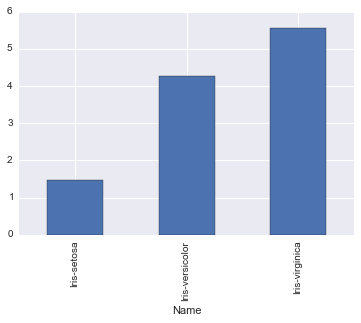

In [21]:
iris_avg['PetalLength'].plot(kind='bar')

...of course, if we don't like the way it looks, we can alter some plotting parameters.  The global parameters are housed in a dictionary called `rcParams`.  Note that sometimes they differ across install versions, but they can always be changed as desired from the following.

In [22]:
rcParams

RcParams({u'agg.path.chunksize': 0,
          u'animation.avconv_args': [],
          u'animation.avconv_path': u'avconv',
          u'animation.bitrate': -1,
          u'animation.codec': u'mpeg4',
          u'animation.convert_args': [],
          u'animation.convert_path': u'convert',
          u'animation.ffmpeg_args': [],
          u'animation.ffmpeg_path': u'ffmpeg',
          u'animation.frame_format': u'png',
          u'animation.mencoder_args': [],
          u'animation.mencoder_path': u'mencoder',
          u'animation.writer': u'ffmpeg',
          u'axes.axisbelow': True,
          u'axes.color_cycle': [(0.2980392156862745,
                                 0.4470588235294118,
                                 0.6901960784313725),
                                (0.3333333333333333,
                                 0.6588235294117647,
                                 0.40784313725490196),
                                (0.7686274509803922,
                                 0.

If we want a white background and we'd like to see our axis borders in all plots, we can change some parameters...

In [23]:
rcParams['axes.facecolor']='w'
rcParams['axes.edgecolor']='k'
rcParams['axes.linewidth']=1

...and there it is.

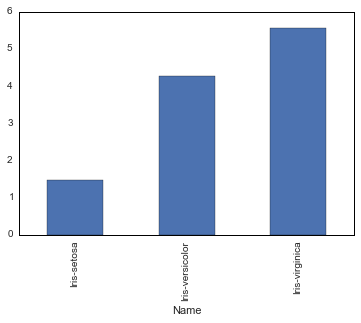

In [24]:
iris_avg['PetalLength'].plot(kind='bar')

If we want to change things in a specific plot, we are free to do that as well.

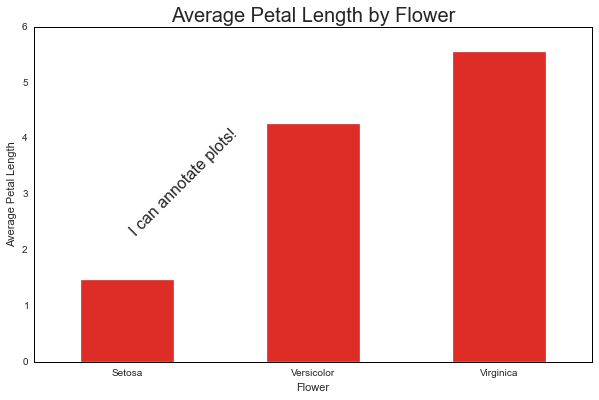

In [31]:
#Generate plot object
fig,ax=plt.subplots(figsize=(10,6))

#Plot data
iris_avg['PetalLength'].plot(kind='bar',ax=ax,color='#de2d26',edgecolor='w')

#Fix labels
ax.set_title('Average Petal Length by Flower',fontsize=20)
ax.set_xlabel('Flower')
ax.set_ylabel('Average Petal Length')
ax.set_xticklabels(['Setosa','Versicolor','Virginica'],rotation=0)
ax.annotate('I can annotate plots!',xy=(0,4),fontsize=16,rotation=45)

Finally, there are some awesome plotting libraries out there, like [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) that are built to play nice with pandas.

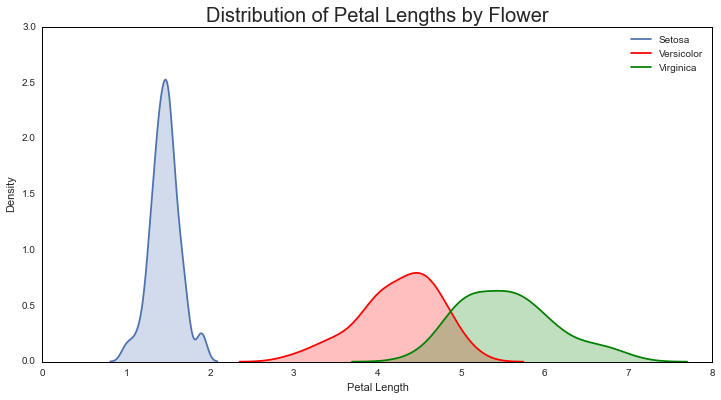

In [45]:
#Generate plot object
fig,ax=plt.subplots(figsize=(12,6))

#Plot distribution of petal lengths for setosa and versicolor
sb.distplot(iris[iris['Name']=='Iris-setosa']['PetalLength'],ax=ax,hist=False,kde_kws={"shade": True},\
            label='Setosa')
sb.distplot(iris[iris['Name']=='Iris-versicolor']['PetalLength'],ax=ax,hist=False,kde_kws={"shade": True},\
            color='r',label='Versicolor')
sb.distplot(iris[iris['Name']=='Iris-virginica']['PetalLength'],ax=ax,hist=False,kde_kws={"shade": True},\
            color='g',label='Virginica')

#Set labels
ax.set_title('Distribution of Petal Lengths by Flower',fontsize=20)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Density');

## Pandas Plays Nice with Analytic Packages

Suppose we want to evaluate the relationship between sepal and petal width.

In [54]:
#Capture dependent
y=iris['SepalLength']

#Capture independents
X=iris[['PetalLength','PetalWidth']]
X=sm.add_constant(X)

#Generate model instance
mod=sm.OLS(y,X)

#Fit model
results=mod.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SepalLength   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 23 Nov 2015   Prob (F-statistic):           4.10e-47
Time:                        16:10:45   Log-Likelihood:                -75.049
No. Observations:                 150   AIC:                             156.1
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.1895      0.097     43.042      0.000         3.997     4.382
PetalLength     0.5410      0.069      7.815      0.000         0.404     0.678
PetalWidth     -0.3167      0.160     -1.978      0.050        -0.633    -0.000
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.552
Skew:                           0.063   Prob(JB):                        0.759
Kurtosis:                       2.731   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Statsmodels](http://statsmodels.sourceforge.net/) is probably the go to econometric package, while [Scikit Learn](http://scikit-learn.org/stable/) is the go to for machine learning.